In [67]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# **Using Numeric Value**

In [68]:
df = pd.read_csv('/content/train.csv',usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [69]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [70]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']
X_train.tail()

,Age,Fare,Age_imputed
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0
102,21.0,77.2875,21.0


In [73]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

<ipython-input-73-52b1f54da57e>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
<ipython-input-73-52b1f54da57e>:2: 

In [74]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,25.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [75]:
X_test

,Age,Fare,Age_imputed
709,NaN,15.2458,51.0
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0
...,...,...,...
433,17.0,7.1250,17.0
773,NaN,7.2250,18.0
25,38.0,31.3875,38.0
84,17.0,10.5000,17.0


<ipython-input-76-fda66e4e0704>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label = 'Original Age')
<ipython-input-76-fda66e4e0704>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed Age')


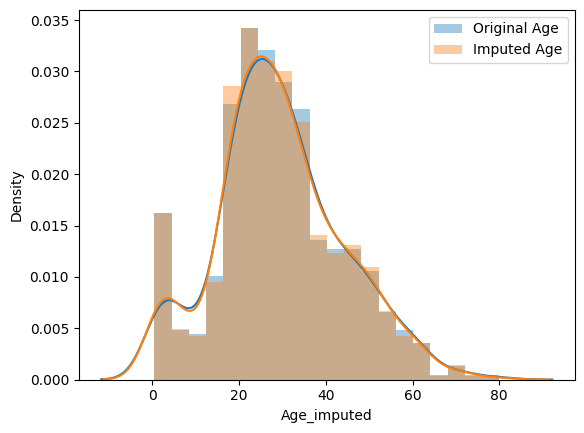

In [76]:
sns.distplot(X_train['Age'],label = 'Original Age')
sns.distplot(X_train['Age_imputed'],label = 'Imputed Age')
plt.legend()
plt.show()

In [77]:
print('Original Variable Variance:',X_train['Age'].var())
print('Variance after random imputation:',X_train['Age_imputed'].var())

Original Variable Variance: 210.2517072477438
Variance after random imputation: 208.87436241703426


In [78]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,50.711617
Age,71.580633,210.251707,210.251707
Age_imputed,50.711617,210.251707,208.874362


<Axes: >

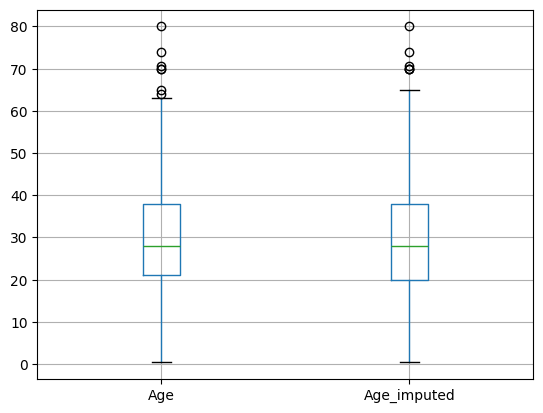

In [79]:
X_train[['Age','Age_imputed']].boxplot()

# **Using Categorical Value**

In [80]:
data = pd.read_csv('/content/train (1) (2).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [81]:
data.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [82]:
X = data
y = data['SalePrice']

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
908,NaN,TA,131000,TA,NaN
334,TA,TA,192000,TA,TA
689,Gd,TA,194700,TA,Gd
467,Gd,TA,146500,TA,Gd
519,Gd,TA,234000,TA,Gd


In [85]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

<ipython-input-85-f59c468b9376>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipytho

In [86]:
temp = pd.concat(
    [X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
     X_train['GarageQual_imputed'].value_counts()/len(X_train)],
     axis=1)
temp.columns = ['Original','Imputed']
temp

,Original,Imputed
TA,0.951087,0.950342
Fa,0.032609,0.034247
Gd,0.011775,0.011130
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [87]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

<ipython-input-87-df503160afbb>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
<ip

In [88]:
temp = pd.concat(
    [X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
     X_train['FireplaceQu_imputed'].value_counts()/len(X_train)],
     axis=1)
temp.columns = ['Original','Imputed']
temp

,Original,Imputed
Gd,0.491143,0.494007
TA,0.405797,0.406678
Fa,0.043478,0.041952
Ex,0.033816,0.032534
Po,0.025765,0.024829


<ipython-input-91-dd02a85f2642>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist = False,label = category)
<ipython-input-91-dd02a85f2642>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']

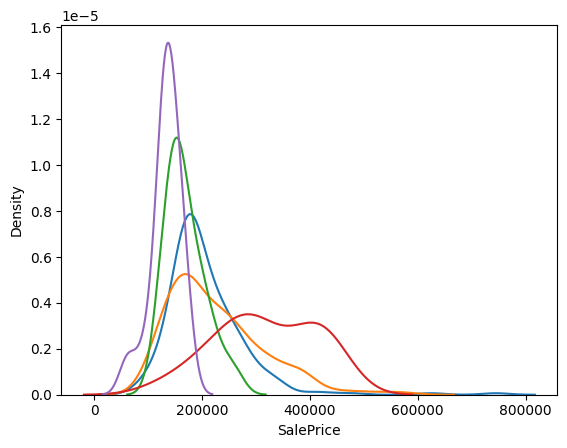

In [91]:
for category in(X_train['FireplaceQu'].dropna().unique()):
  sns.distplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],hist = False,label = category)
plt.show()

<ipython-input-92-d37364a53905>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist = False,label = category)
<ipython-input-92-d37364a53905>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firep

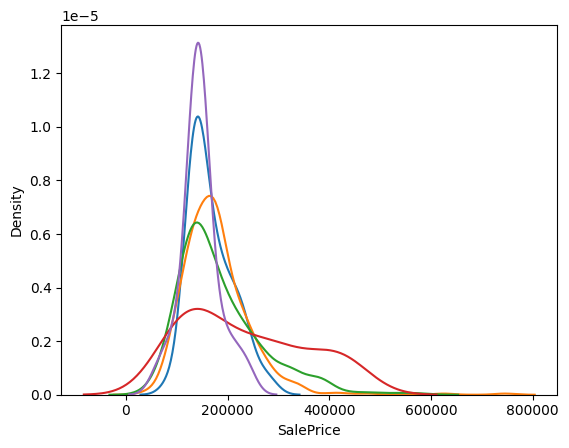

In [92]:
for category in(X_train['FireplaceQu_imputed'].dropna().unique()):
  sns.distplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],hist = False,label = category)
plt.show()